In [1]:
import keras

Using TensorFlow backend.


In [0]:
#Using Keras and building a CNN Model and then getting explanations using SHAP

In [0]:
import numpy as np

In [0]:
from keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [0]:
image = (train_x[0].reshape(28,28))

In [0]:
import matplotlib.pyplot as plt

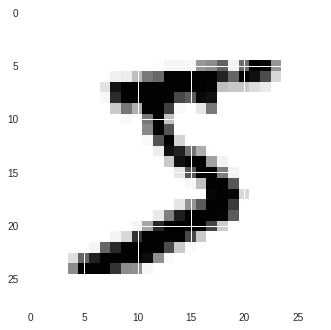

In [6]:
plt.imshow(image)

In [7]:
train_x.shape

(60000, 28, 28)

In [0]:
train_x = train_x.astype('float32')

In [0]:
train_x/=255

In [0]:
image = (train_x[0].reshape(28,28))

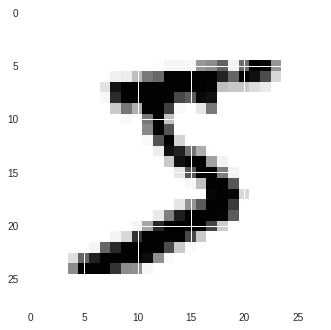

In [12]:
plt.imshow(image)

In [0]:
test_x = test_x.astype('float32')

In [0]:
test_x/=255

In [0]:
from keras.utils import to_categorical

In [0]:
train_y = to_categorical(train_y)

In [0]:
test_y = to_categorical(test_y)

In [0]:
#CNN Model

In [0]:
#Let our model have three Convolutional Layers

#The first layer will have 16 3X3 filters.
#The second layer will have 32 3X3 filters.
#The third layer will have 64 3X3 filters.

#Each layer will have a corresponding bias term as well.

#At the end of each layer we will have a max pooling layer performing the pooling operation
#The pool will be done by a 2X2 filter.

#We will then flatten the output from the last convolution layer to feed it as the input to the fully connected layer.

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [0]:
input_shape = train_x[0].shape

In [29]:
input_shape

(28, 28)

In [0]:
batch_size = 128
num_classes = 10
number_of_epochs = 50

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16,kernel_size = (3,3),activation = 'relu', input_shape = (28,28,1)))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [0]:
train_x = np.reshape(train_x,(-1,28,28,1))

In [0]:
test_x = np.reshape(test_x,(-1,28,28,1))

In [48]:
model.fit(train_x, train_y,batch_size=batch_size,epochs=number_of_epochs,verbose=1,validation_data=(test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.6266 - acc: 0.7986 - val_loss: 0.1216 - val_acc: 0.9634
Epoch 2/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1954 - acc: 0.9429 - val_loss: 0.0812 - val_acc: 0.9735
Epoch 3/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1460 - acc: 0.9580 - val_loss: 0.0715 - val_acc: 0.9766
Epoch 4/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1238 - acc: 0.9651 - val_loss: 0.0643 - val_acc: 0.9794
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1093 - acc: 0.9687 - val_loss: 0.0580 - val_acc: 0.9817
Epoch 6/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0971 - acc: 0.9728 - val_loss: 0.0614 - val_acc: 0.9814
Epoch 7/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.0881 - acc: 0.9751 - val_loss: 0.0570 - val_ac

In [0]:
test_loss, accuracy = model.evaluate(test_x,test_y,verbose = 0)

In [50]:
print("Accuracy is : ",accuracy)

Accuracy is :  0.9862


In [0]:
predictions = model.predict(test_x)

In [0]:
predictions.shape

predicted_values = [np.argmax(i) for i in predictions]

actual_values = [np.argmax(i) for i in test_y]

In [0]:
from sklearn.metrics import f1_score

In [65]:
f1score = f1_score(actual_values,predicted_values,average='weighted')

print("F1 Score is : ",f1score)

F1 Score is :  0.9861924246653678


In [0]:
from sklearn.metrics import recall_score

In [67]:
recall = recall_score(actual_values,predicted_values,average = 'weighted')

print("Recall Score is : ",recall)

Recall Score is :  0.9862


In [0]:
from sklearn.metrics import precision_score

In [69]:
precision = precision_score(actual_values,predicted_values,average = 'weighted')

print("Precision Score is : ",precision)

Precision Score is :  0.9862355551878332


In [0]:
#Explanation using SHAP

In [71]:
!pip install shap

In [0]:
import shap

In [0]:
background = train_x[np.random.choice(train_x.shape[0], 100, replace=False)]

In [0]:
explainer = shap.DeepExplainer(model, background)

In [0]:
shap_values = explainer.shap_values(test_x[1:2])

In [0]:
labels = [str(i) for i in range(10)]

In [135]:
shap_values[0].shape[0]

1

In [131]:
np.array(labels).shape

(10,)

In [166]:
import skimage.color

try:
    import matplotlib.pyplot as pl
    import matplotlib
    from matplotlib.colors import LinearSegmentedColormap

    def lch2rgb(x):
        return skimage.color.lab2rgb(skimage.color.lch2lab([[x]]))[0][0]

    # define our colors using Lch
    # note that we intentionally vary the lightness during interpolation so as to better
    # enable the eye to see patterns (since patterns are most easily recognized through
    # lightness variability)
    blue_lch = [54., 70., 4.6588]
    l_mid = 40.
    red_lch = [54., 90., 0.35470565 + 2* np.pi]
    gray_lch = [55., 0., 0.]
    blue_rgb = lch2rgb(blue_lch)
    red_rgb = lch2rgb(red_lch)
    gray_rgb = lch2rgb(gray_lch)

    # define a perceptually uniform color scale using the Lch color space
    reds = []
    greens = []
    blues = []
    alphas = []
    nsteps = 100
    l_vals = list(np.linspace(blue_lch[0], l_mid, nsteps/2)) + list(np.linspace(l_mid, red_lch[0], nsteps/2))
    c_vals = np.linspace(blue_lch[1], red_lch[1], nsteps)
    h_vals = np.linspace(blue_lch[2], red_lch[2], nsteps)
    for pos,l,c,h in zip(np.linspace(0, 1, nsteps), l_vals, c_vals, h_vals):
        lch = [l, c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))

    red_blue = LinearSegmentedColormap('red_blue', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })
    red_blue.set_bad(gray_rgb, 1.0)
    red_blue.set_over(gray_rgb, 1.0)
    red_blue.set_under(gray_rgb, 1.0) # "under" is incorrectly used instead of "bad" in the scatter plot

    red_blue_no_bounds = LinearSegmentedColormap('red_blue_no_bounds', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })

    # define a circular version of the color scale for categorical coloring
    reds = []
    greens = []
    blues = []
    alphas = []
    nsteps = 100
    c_vals = np.linspace(blue_lch[1], red_lch[1], nsteps)
    h_vals = np.linspace(blue_lch[2], red_lch[2], nsteps)
    for pos,c,h in zip(np.linspace(0, 0.5, nsteps), c_vals, h_vals):
        lch = [blue_lch[0], c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))
    c_vals = np.linspace(red_lch[1], blue_lch[1], nsteps)
    h_vals = np.linspace(red_lch[2] - 2 * np.pi, blue_lch[2], nsteps)
    for pos,c,h in zip(np.linspace(0.5, 1, nsteps), c_vals, h_vals):
        lch = [blue_lch[0], c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))

    red_blue_circle = LinearSegmentedColormap('red_blue_circle', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })

    colors = []
    for l in np.linspace(1, 0, 100):
        colors.append((30./255, 136./255, 229./255,l))
    for l in np.linspace(0, 1, 100):
        colors.append((255./255, 13./255, 87./255,l))
    red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

    colors = []
    for l in np.linspace(0, 1, 100):
        colors.append((30./255, 136./255, 229./255,l))
    transparent_blue = LinearSegmentedColormap.from_list("transparent_blue", colors)

    colors = []
    for l in np.linspace(0, 1, 100):
        colors.append((255./255, 13./255, 87./255,l))
    transparent_red = LinearSegmentedColormap.from_list("transparent_red", colors)


except ImportError:
    pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [0]:
def image_plot(shap_values, x, labels=None, show=True):
    """ Plots SHAP values for image inputs.
    """

    multi_output = True
    if type(shap_values) != list:
        multi_output = False
        shap_values = [shap_values]

    # make sure labels
    if labels is not None:
        assert labels.shape[0] == shap_values[0].shape[0], "Labels must have same row count as shap_values arrays!"
        if multi_output:
            assert labels.shape[1] == len(shap_values), "Labels must have a column for each output in shap_values!"
        else:
            assert len(labels.shape) == 1, "Labels must be a vector for single output shap_values."

    # plot our explanations
    fig_size = np.array([3 * (len(shap_values) + 1), 2.5 * (x.shape[0] + 1)])
    if fig_size[0] > 20:
        fig_size *= 20 / fig_size[0]
    fig, axes = plt.subplots(nrows=x.shape[0], ncols=len(shap_values) + 1, figsize=fig_size)
    if len(axes.shape) == 1:
        axes = axes.reshape(1,axes.size)
    for row in range(x.shape[0]):
        x_curr = x[row].copy()

        # make sure
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 1:
            x_curr = x_curr.reshape(x_curr.shape[:2])
        if x_curr.max() > 1:
            x_curr /= 255.

        # get a grayscale version of the image
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 3:
            x_curr_gray = (0.2989 * x_curr[:,:,0] + 0.5870 * x_curr[:,:,1] + 0.1140 * x_curr[:,:,2]) # rgb to gray
        else:
            x_curr_gray = x_curr

        axes[row,0].imshow(x_curr, cmap=plt.get_cmap('gray'))
        axes[row,0].axis('off')
        if len(shap_values[0][row].shape) == 2:
            abs_vals = np.stack([np.abs(shap_values[i]) for i in range(len(shap_values))], 0).flatten()
        else:
            abs_vals = np.stack([np.abs(shap_values[i].sum(-1)) for i in range(len(shap_values))], 0).flatten()
        max_val = np.nanpercentile(abs_vals, 99.9)
        for i in range(len(shap_values)):
            if labels is not None:
                axes[row,i+1].set_title(labels[row,i])
            sv = shap_values[i][row] if len(shap_values[i][row].shape) == 2 else shap_values[i][row].sum(-1)
            axes[row,i+1].imshow(x_curr_gray, cmap=plt.get_cmap('gray'), alpha=0.15, extent=(-1, sv.shape[0], sv.shape[1], -1))
            im = axes[row,i+1].imshow(sv, cmap=red_transparent_blue, vmin=-max_val, vmax=max_val)
            axes[row,i+1].axis('off')
    cb = fig.colorbar(im, ax=np.ravel(axes).tolist(), label="SHAP value", orientation="horizontal", aspect=fig_size[0]/0.2)
    cb.outline.set_visible(False)
    if show:
        plt.show()
    
    return fig,axes

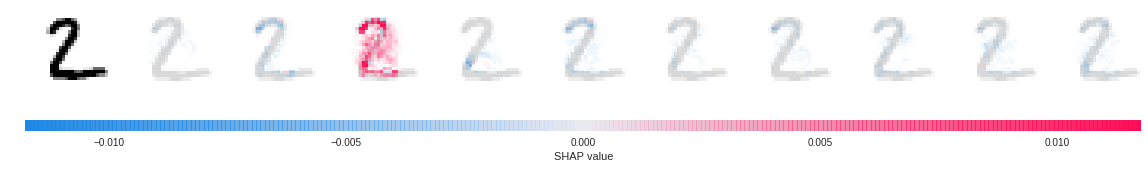

In [229]:
fig,axes = image_plot(shap_values, -test_x[1:2])

In [0]:
axes_from_fig = fig.get_axes()

In [0]:
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

In [0]:
fig.savefig('ax2_figure.png', bbox_inches=extent)

In [0]:
def get_explanation_image(x,output_label,outputFileName):
  shap_values = explainer.shap_values(test_x[1:2])
  fig,axes = image_plot(shap_values, -x)
  axes_from_fig = fig.get_axes()
  extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
  fig.savefig(outputFileName, bbox_inches=extent)  

In [0]:
def add_noise(image):
  row,col = image.shape
  s_vs_p = 0.5
  amount = 0.01
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  return out

In [0]:
from skimage.measure import structural_similarity as ssim
import cv2

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
  # compute the mean squared error and structural similarity
  # index for the images
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB,multichannel=True)

  # setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  # show the images
  plt.show() 
  return m,s

In [0]:
original_image = test_x[1:2]

In [298]:
original_image.shape

(1, 28, 28, 1)

In [0]:
noisy_image = add_noise(original_image.reshape(28,28))

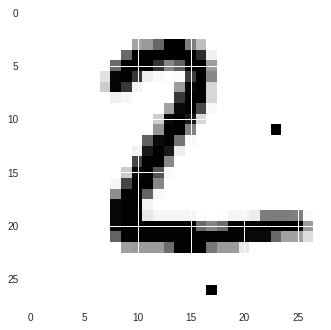

In [300]:
plt.imshow(noisy_image)

In [0]:
original_image_explanation = "explanation_original.jpeg"
noisy_image_explanation = "explanation_noisy_image.jpeg"

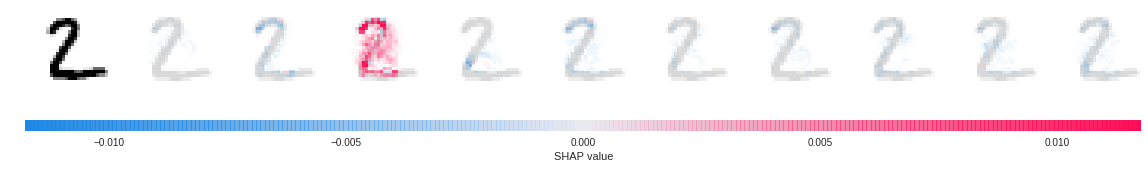

In [302]:
get_explanation_image(original_image,2,original_image_explanation)

In [303]:
noisy_image.shape

(28, 28)

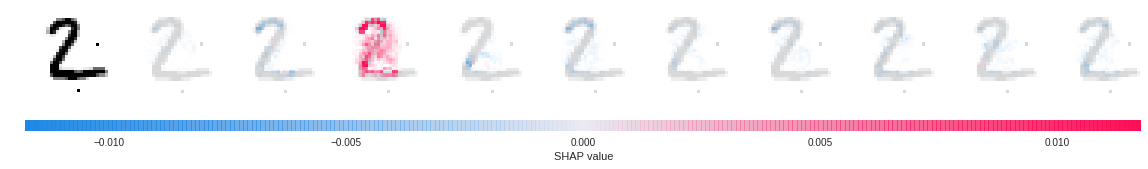

In [304]:
get_explanation_image(np.reshape(noisy_image,(1,28,28,1)),2,noisy_image_explanation)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


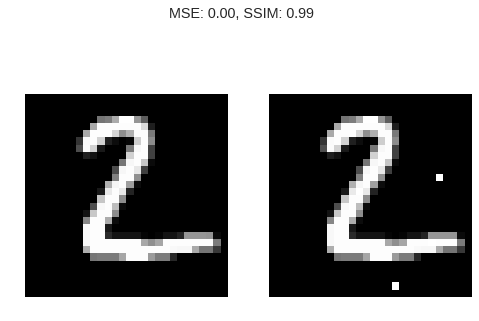

In [305]:
mse1,s1 = compare_images(original_image.reshape(28,28),noisy_image.reshape(28,28),"Image Difference")

In [0]:
noisy_explanation = cv2.imread(noisy_image_explanation)

In [0]:
original_explanation = cv2.imread(original_image_explanation)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


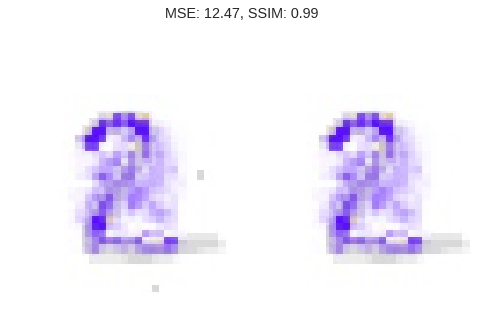

In [308]:
mse2,s2= compare_images(noisy_explanation,original_explanation,"Image Difference")

In [0]:
#stability score for the current image
# stability = change in the explanation / change in the input
stability = mse2/mse1

In [310]:
stability

4889.2549478283745